# Support vector machines

*This tutorial is based on Jake VanderPlas's excellent [Scikit-learn Tutorial](http://jakevdp.github.io/sklearn_tutorial/) about support vector machines*.

Support vector machines (SVMs) are supervised learning algorithms which can be used for classification as well as regression. 

In classification, it uses a discriminative classifier which means it draws a boundary between clusters of data.

## Intuiton

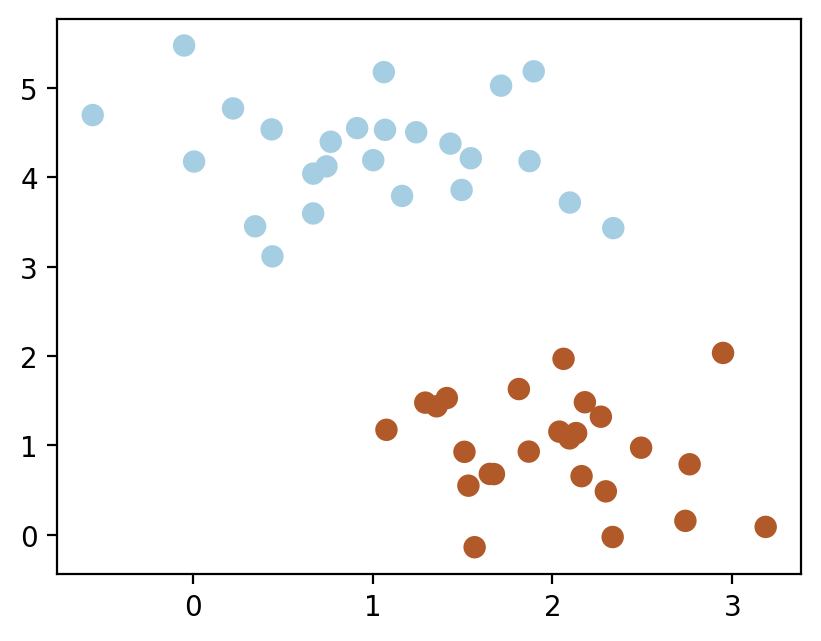

In [20]:
# HIDE CODE
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);

Next, we take a look at different separators which are able to discriminate between these samples. Depending on which one of them you choose, a new data point could be classified differently:

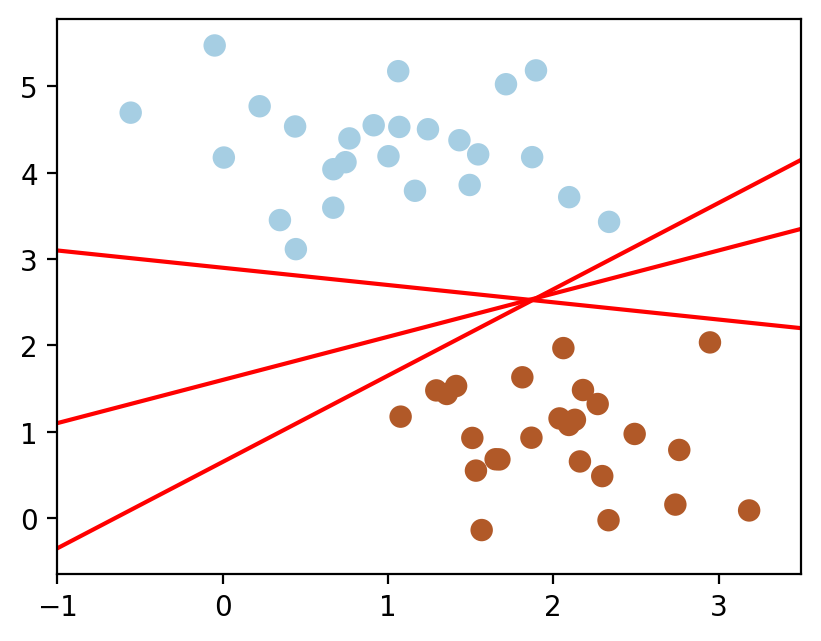

In [21]:
# HIDE CODE
import numpy as np

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-r')
plt.xlim(-1, 3.5);

Support vector machines are one way to address this. What support vector machined do is to not only draw a simple line, but they also consider a region about the line of some given width. 

Here's an example of what it might look like:

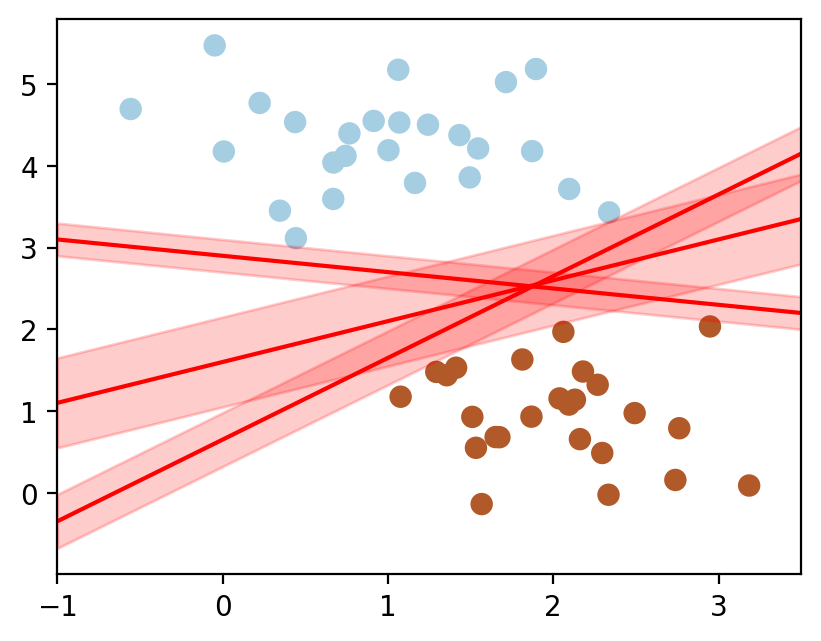

In [22]:
# HIDE CODE
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-r')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='r', alpha=0.2)

plt.xlim(-1, 3.5);

Notice here that if we want to maximize this width, the middle fit is  the best. 

This is the intuition of support vector machines, which optimize a linear discriminant model in conjunction with a margin representing the perpendicular distance between the datasets

## Model

Now we'll fit a support vector machine classifier to these points.

In [23]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

We create a function that will plot SVM decision boundaries for us — and then use it to visualize our classifier.

In [24]:
# HIDE CODE
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

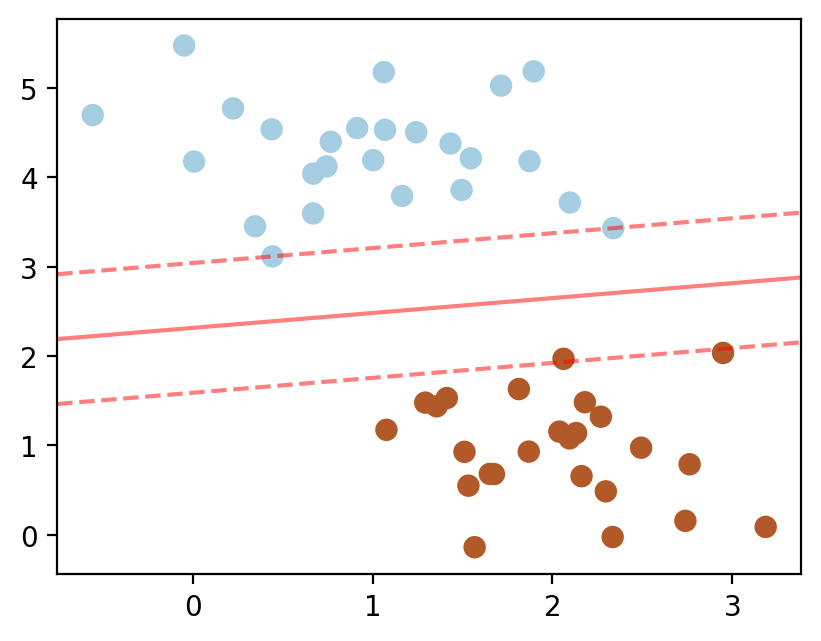

In [25]:
# HIDE CODE
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired);
plot_svc_decision_function(clf);

Note that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known as the **support vectors** (giving the algorithm its name). 

In scikit-learn, these are stored in the support_vectors_ attribute
of the classifier (highlighted in red):

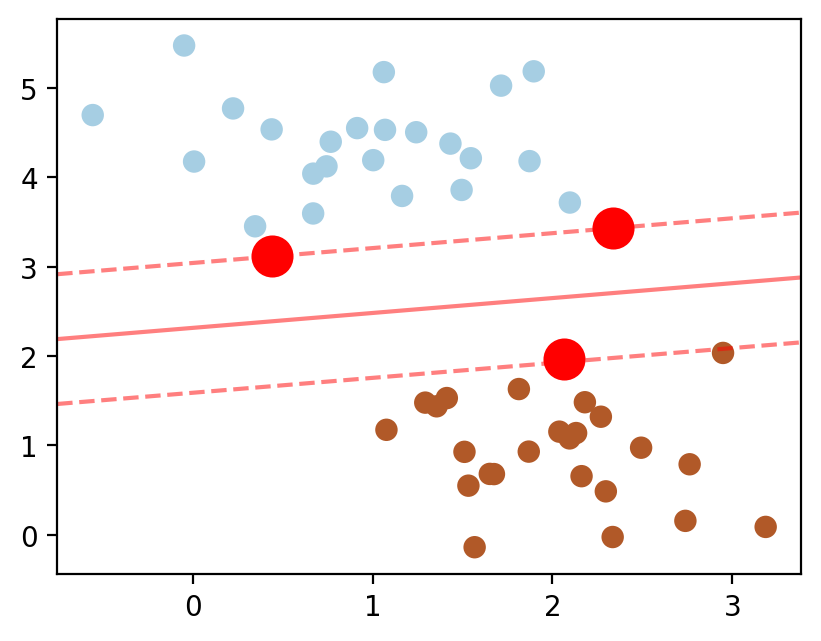

In [26]:
# HIDE CODE
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

plot_svc_decision_function(clf)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='red');

For our SVM classifier, only the support vectors matter. This means if you move any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results.

## Kernel methods

SVM are especially powerful in combination with so called kernels. To understand the need for kernels, let's take a look at some data which is not linearly separable:

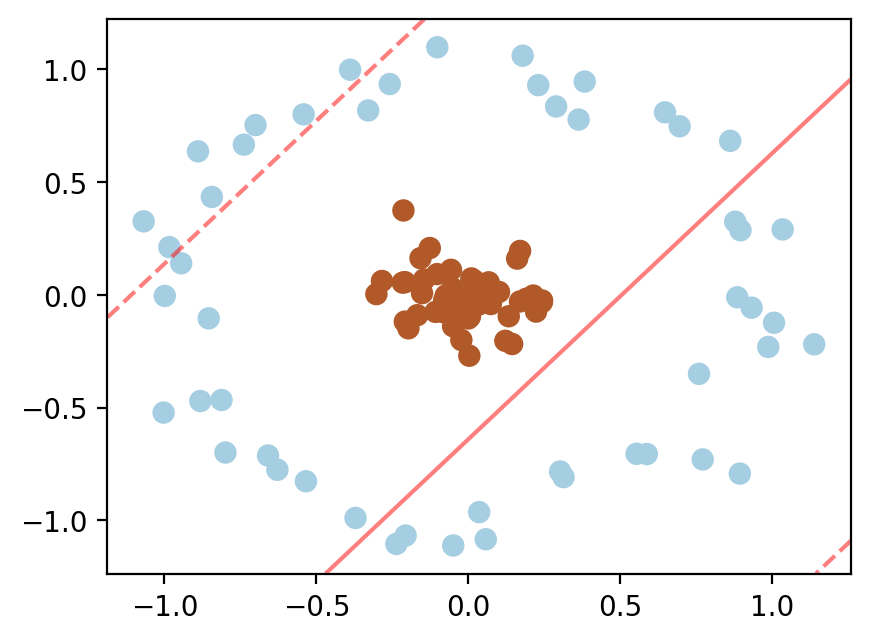

In [14]:
# HIDE CODE
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf);

Clearly, no linear discrimination will ever separate these data. One way we can adjust this is to apply a kernel, which is some functional transformation of the input data.

### Radial basis function


#### Intuition

For example, one simple model to separate the clusters is to use a radial basis:

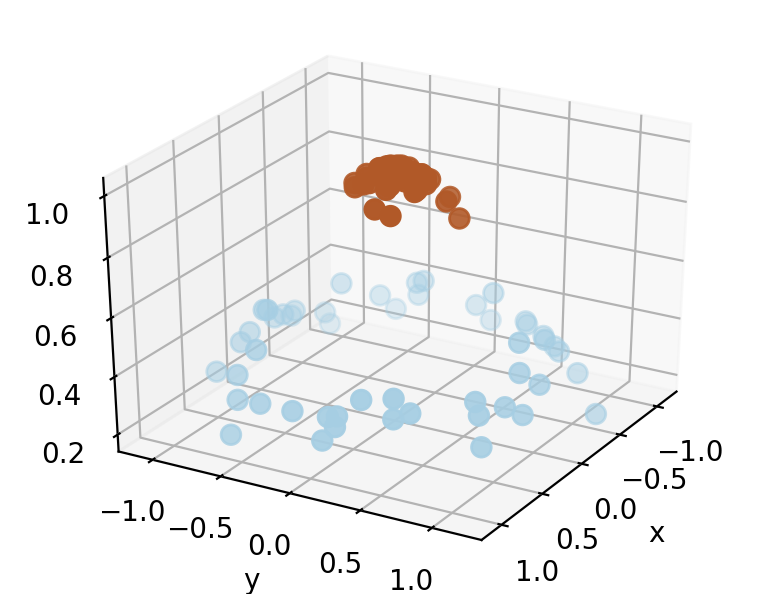

In [9]:
# HIDE CODE
from mpl_toolkits import mplot3d
# radial basis
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
# plot
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap=plt.cm.Paired)
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

We can see that with this additional dimension, the data becomes trivially linearly separable.

#### Scikit-learn

What we used was a relatively simple kernel; SVM has a more sophisticated version of this kernel built-in to the process. This is accomplished by using kernel='rbf', short for radial basis function:



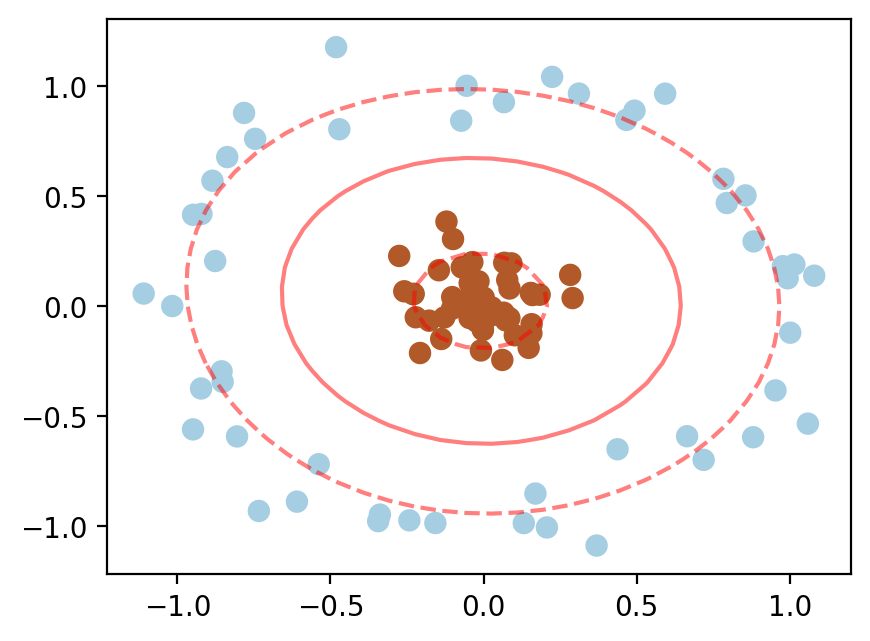

In [10]:
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none');

Here there are effectively 𝑁 basis functions: one centered at each point! Through a clever mathematical trick, this computation proceeds very efficiently using the "Kernel Trick", without actually constructing the matrix of kernel evaluations.